In [ ]:
import torch 
import torchvision 
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn

In [ ]:
print("GPU available - {}".format(torch.cuda.is_available()))

GPU available - True


In [ ]:
if torch.cuda.is_available():
  device='cuda'
else:
  device='cpu'
device

'cuda'

In [ ]:
#pipelinning
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)) ])

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
trainset = torchvision.datasets.MNIST('mnist',
                                      train = True,
                                      download = True,
                                      transform = transform)
testset = torchvision.datasets.MNIST('mnist',
                                     train = False,
                                     download = True,
                                     transform = transform)

In [ ]:
print(trainset.data[0].shape)
print(trainset.data[0])

torch.Size([28, 28])
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,  

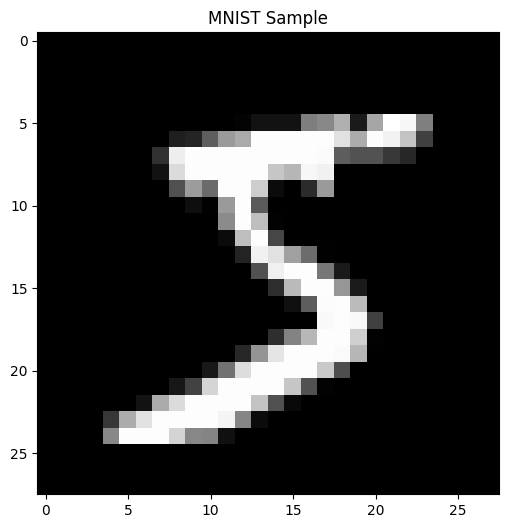

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def imgshow(title="", image=None, size = 6):
  w, h = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize=(size*aspect_ratio,size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)

image = trainset.data[0].numpy()
imgshow("MNIST Sample", image)
  

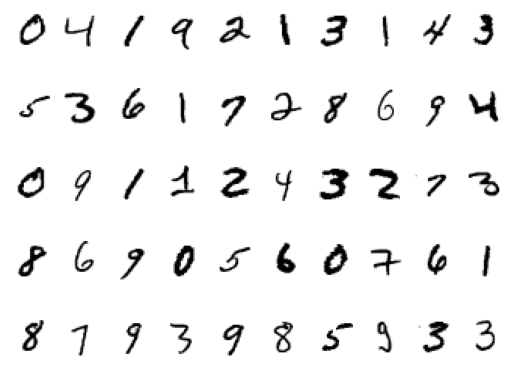

In [ ]:
import matplotlib.pyplot as plt

figure = plt.figure()
noi = 50

for index in range(1,noi+1):
  plt.subplot(5,10,index)
  plt.axis('off')
  plt.imshow(trainset.data[index], cmap='gray_r')

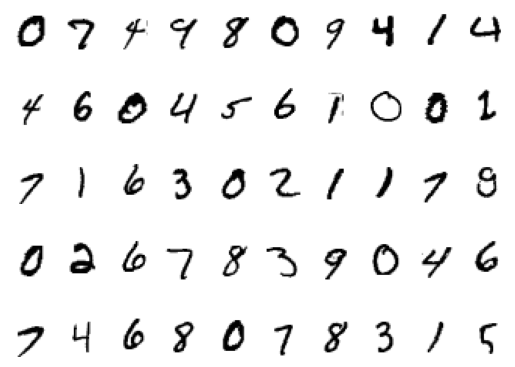

In [ ]:
import matplotlib.pyplot as plt
def matshow50(index1,index2):
  plt.figure()
  i=0
  for index in range(1,51):
    plt.subplot(5,10,index)
    plt.axis("off")
    plt.imshow(trainset.data[index1+i], cmap="gray_r")
    i=i+1

matshow50(51,100)

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=True, num_workers=0)

In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape)
print(labels.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])


In [ ]:
next(dataiter)

[tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           ...,
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.]]],
 
 
         [[[-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           ...,
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.]]],
 
 
         [[[-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           ...,
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.]]],
 
 
         ...,
 
 
         [[[-1., -1., -1.,  ..., -

In [ ]:
#image in one batch is 128
#lets see first image
images[0].shape

torch.Size([1, 28, 28])

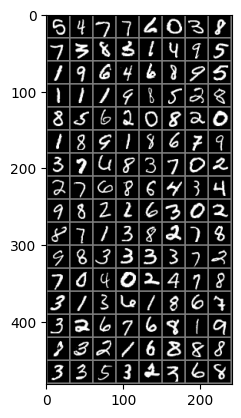

54776038738314951964689511198528856208201891867937683702276864349822630287138278983333727040247831361867326768198321688833532368


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(''.join('%1s' % labels[j].numpy() for j in range(128)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1 = nn.Conv2d(1,32,3)
    self.conv2 = nn.Conv2d(32,64,3)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(64*12*12,128)
    self.fc2 = nn.Linear(128,10)

  def forward(self,x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    x = x.view(-1,64*12*12)
    # print(x.shape)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

net=Net()
net.to(device)


Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
epochs = 10

epoch_log = []
loss_log = []
accuracy_log = []

for epoch in range(epochs):
  print(f'Starting Epoch: {epoch+1}')

  running_loss = 0.0

  for i, data in enumerate(trainloader, 0):
    inputs, labels = data

    inputs = inputs.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    # print(inputs)
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    if i%50==49:
      correct = 0
      total = 0 

      with torch.no_grad():
        for data in testloader:
          images, labels = data
          images = images.to(device)
          labels = labels.to(device)

          outputs = net(images)
          _,predicted = torch.max(outputs.data, dim=1)

          total += labels.size(0)
          correct += (predicted==labels).sum().item()

        accuracy = 100*correct/total
        epoch_num = epoch+1
        batch_completed = i+1
        actual_loss = running_loss/50
        print(f'Epoch: {epoch_num}, Mini_Batches completed: {batch_completed}, Loss: {actual_loss:.3f}, Accuracy: {accuracy}%')
        running_loss = 0.0
      
  epoch_log.append(epoch_num)
  loss_log.append(actual_loss)
  accuracy_log.append(accuracy)

print("Finished Training")


Starting Epoch: 1
Epoch: 1, Mini_Batches completed: 50, Loss: 2.258, Accuracy: 37.24%
Epoch: 1, Mini_Batches completed: 100, Loss: 2.046, Accuracy: 67.9%
Epoch: 1, Mini_Batches completed: 150, Loss: 1.372, Accuracy: 81.46%
Epoch: 1, Mini_Batches completed: 200, Loss: 0.684, Accuracy: 86.34%
Epoch: 1, Mini_Batches completed: 250, Loss: 0.513, Accuracy: 87.52%
Epoch: 1, Mini_Batches completed: 300, Loss: 0.421, Accuracy: 88.01%
Epoch: 1, Mini_Batches completed: 350, Loss: 0.399, Accuracy: 88.85%
Epoch: 1, Mini_Batches completed: 400, Loss: 0.385, Accuracy: 88.49%
Epoch: 1, Mini_Batches completed: 450, Loss: 0.374, Accuracy: 89.56%
Starting Epoch: 2
Epoch: 2, Mini_Batches completed: 50, Loss: 0.391, Accuracy: 89.98%
Epoch: 2, Mini_Batches completed: 100, Loss: 0.339, Accuracy: 89.94%
Epoch: 2, Mini_Batches completed: 150, Loss: 0.345, Accuracy: 91.1%
Epoch: 2, Mini_Batches completed: 200, Loss: 0.315, Accuracy: 90.86%
Epoch: 2, Mini_Batches completed: 250, Loss: 0.306, Accuracy: 90.98%
Ep

In [ ]:
PATH = './mnist_cnn_net.pth'
torch.save(net.state_dict(), PATH)

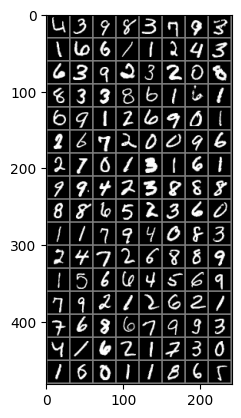

GroundTruth:  43983793166112436392320883386161691269012672009627013161994238888865236011794083247268891566456979212621768679934162173016011865


In [ ]:
dataiter = iter(testloader)
images, labels =next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ',''.join('%1s' % labels[j].numpy() for j in range(128)))

In [ ]:
net=Net()
net.to(device)

net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
test_iter = iter(testloader)

images, labels = next(test_iter)

images = images.to(device)
labels = labels.to(device)

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ''.join('%1s' % predicted[j].cpu().numpy() for j in range(128)))

Predicted:  62455045313922415522031155433215952173990098527057584261501743737593935590112218242933550310201228020472551316327372777479087627


In [ ]:
correct = 0 
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data

        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.3}%')

Accuracy of the network on the 10000 test images: 98.0%


Text(0, 0.5, 'Test Accuracy')

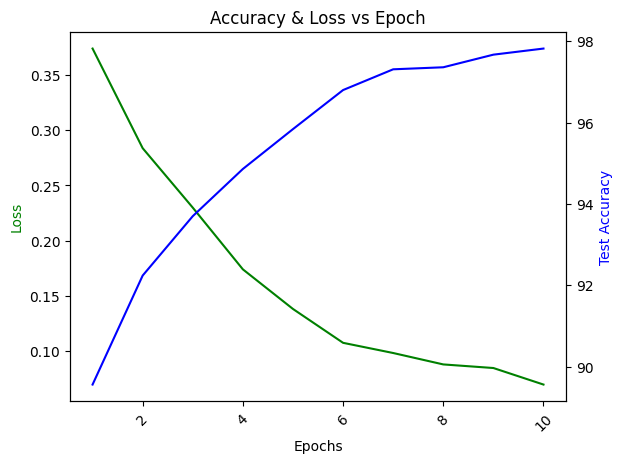

In [ ]:
fig, ax1 = plt.subplots()

plt.title("Accuracy & Loss vs Epoch")
plt.xticks(rotation=45)

ax2 = ax1.twinx()

ax1.plot(epoch_log, loss_log, 'g-')
ax2.plot(epoch_log, accuracy_log, 'b-')

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='g')
ax2.set_ylabel('Test Accuracy', color='b')